In [72]:
# 1. Các thư viện cần thiết
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression

In [73]:
# 2. Đọc file dữ liệu và chia train test validate theo tỉ lệ 6:3:1
df = pd.read_csv('/content/HPG-Historical-Data.csv', sep=",")
df=df['Price']

df = df.dropna() # Drop missing values
df = df.reset_index(drop=True) # Reset the index
df = df.str.replace(',', '').astype(float)

# Split the data into training, testing, and validation sets
train_size = int(0.8 * len(df))
test_size = int(0.2 * len(df))

train_data = df[:train_size]
test_data = df[train_size:]

In [74]:
# 3. Quá trình Training
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data)
# Convert y_train to numeric, removing commas and handling potential errors

# Train the linear regression model
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [75]:
# 4. Quá trình testing
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data)
y_pred = model.predict(x_test)

In [76]:
# 6. Quá trình tạo index predict 30 ngày tiếp theo
last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

# Create an array of 30 consecutive integers starting from last_index
x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)

# Predict the closing prices for the next 30 days
y_next_30_days = model.predict(x_next_30_days)

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

Predicted closing prices for the next 30 days:
[21389.96574191 21386.17702896 21382.38831601 21378.59960306
 21374.8108901  21371.02217715 21367.2334642  21363.44475125
 21359.65603829 21355.86732534 21352.07861239 21348.28989944
 21344.50118649 21340.71247353 21336.92376058 21333.13504763
 21329.34633468 21325.55762172 21321.76890877 21317.98019582
 21314.19148287 21310.40276992 21306.61405696 21302.82534401
 21299.03663106 21295.24791811 21291.45920515 21287.6704922
 21283.88177925 21280.0930663 ]


In [77]:
# 7. Đánh giá độ chính xác thuật toán
#RMSE
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Testing RMSE:', test_rmse)

#MAPE
test_mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print('Testing MAPE:', test_mape)

#MAE
test_mae = np.mean(np.abs(y_pred - y_test))
print('Testing MAE:', test_mae)

Testing RMSE: 11276.387039871484
Testing MAPE: 106.56270915194364
Testing MAE: 11243.70056643857


In [78]:
last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+90, step=1)

# Create an array of 90 consecutive integers starting from last_index
x_next_90_days = np.array(range(last_index+1, last_index+91)).reshape(-1, 1)

# Predict the closing prices for the next 90 days
y_next_90_days = model.predict(x_next_90_days)

# Print the predicted closing prices for the next 90 days
print('Predicted closing prices for the next 90 days:')
print(y_next_90_days)

Predicted closing prices for the next 90 days:
[21389.96574191 21386.17702896 21382.38831601 21378.59960306
 21374.8108901  21371.02217715 21367.2334642  21363.44475125
 21359.65603829 21355.86732534 21352.07861239 21348.28989944
 21344.50118649 21340.71247353 21336.92376058 21333.13504763
 21329.34633468 21325.55762172 21321.76890877 21317.98019582
 21314.19148287 21310.40276992 21306.61405696 21302.82534401
 21299.03663106 21295.24791811 21291.45920515 21287.6704922
 21283.88177925 21280.0930663  21276.30435335 21272.51564039
 21268.72692744 21264.93821449 21261.14950154 21257.36078858
 21253.57207563 21249.78336268 21245.99464973 21242.20593677
 21238.41722382 21234.62851087 21230.83979792 21227.05108497
 21223.26237201 21219.47365906 21215.68494611 21211.89623316
 21208.1075202  21204.31880725 21200.5300943  21196.74138135
 21192.9526684  21189.16395544 21185.37524249 21181.58652954
 21177.79781659 21174.00910363 21170.22039068 21166.43167773
 21162.64296478 21158.85425183 21155.06

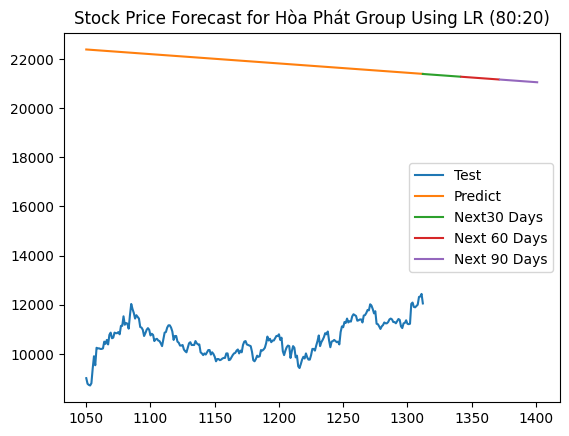

In [79]:
# 8.Vẽ hình
plt.plot(test_data.index, test_data)
plt.plot(test_data.index, y_pred)
plt.plot(range(last_data.start, last_data.start + 30), y_next_90_days[:30])
plt.plot(range(last_data.start+30, last_data.start + 60), y_next_90_days[30:60])
plt.plot(range(last_data.start+60, last_data.start + 90), y_next_90_days[60:90])
plt.legend(['Test', 'Predict','Next30 Days', "Next 60 Days", "Next 90 Days"])
plt.title("Stock Price Forecast for Hòa Phát Group Using LR (80:20)")
plt.show()

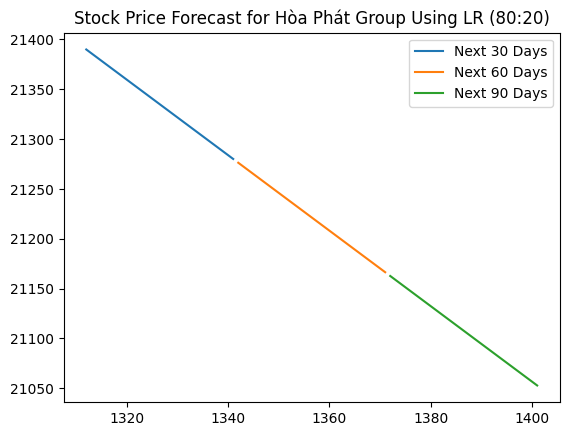

In [80]:
plt.plot(range(last_data.start, last_data.start + 30), y_next_90_days[:30])
plt.plot(range(last_data.start+30, last_data.start + 60), y_next_90_days[30:60]) # Slice y_next_90_days to match x-axis dimensions
plt.plot(range(last_data.start+60, last_data.start + 90), y_next_90_days[60:90])
plt.legend(["Next 30 Days", "Next 60 Days", "Next 90 Days"])
plt.title("Stock Price Forecast for Hòa Phát Group Using LR (80:20)")
plt.show()